# Indian startup funding analysis -Exploratory Data Analysis

Loading and First Look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')




load the dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


# Basic Data Set Information

In [ ]:
df.shape

(102, 8)

In [ ]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


# Data Quality Assessment

In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [ ]:
df.isnull().sum()


,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

basic statics

In [ ]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


key insights to discuss

Data preprocessing

clean columns and names

In [ ]:
df.columns=df.columns.str.strip()

convert entry columns to date time


In [ ]:
df['Entry_Date'] =pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()



,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


# Create Valuation Growth Metric

In [ ]:
df['Valuation_Growth']=df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


# Extract Primary City (before '/')

In [ ]:
df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


# Count Number of Investors

In [ ]:
df['investors_Count'] = df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,investors_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


 # Univariate Analysis

# Valuations Distribution Analysis

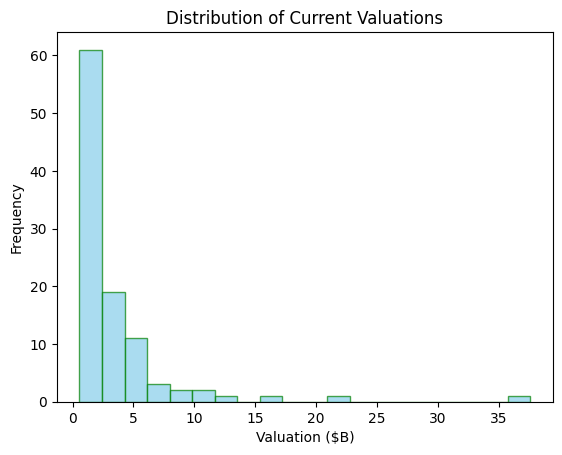

In [ ]:
plt.hist(df['Valuation ($B)'] , bins=20,alpha=0.7,color='skyblue',edgecolor='green')
plt.title('Distribution of Current Valuations')



plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()




sector distribution

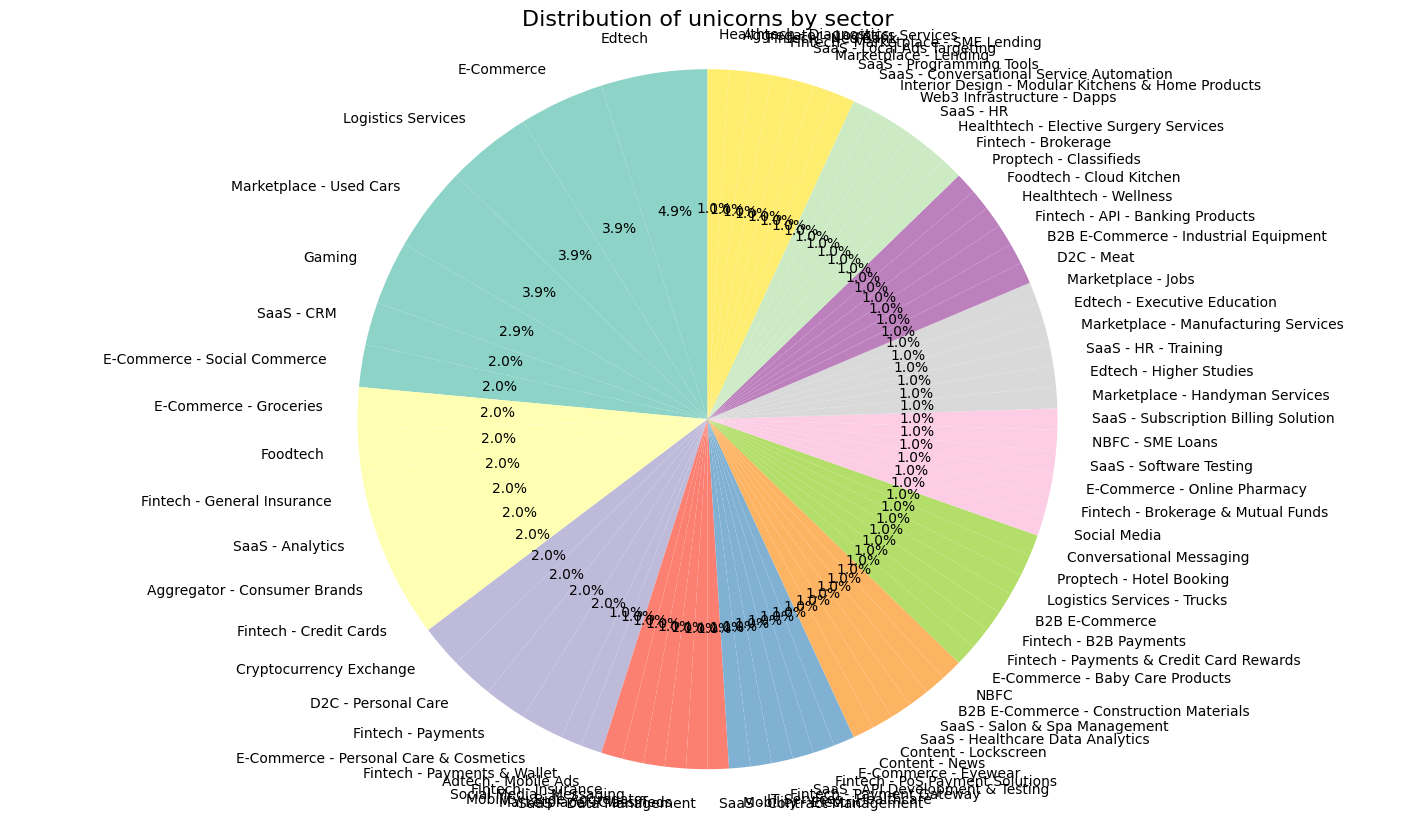

In [ ]:
plt.figure(figsize=(18, 10))
sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0, 1, len(sector_counts)))


plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%', colors=colors,startangle=90)
plt.title('Distribution of unicorns by sector',fontsize=16,fontweight='21')
plt.axis('equal')
plt.show()




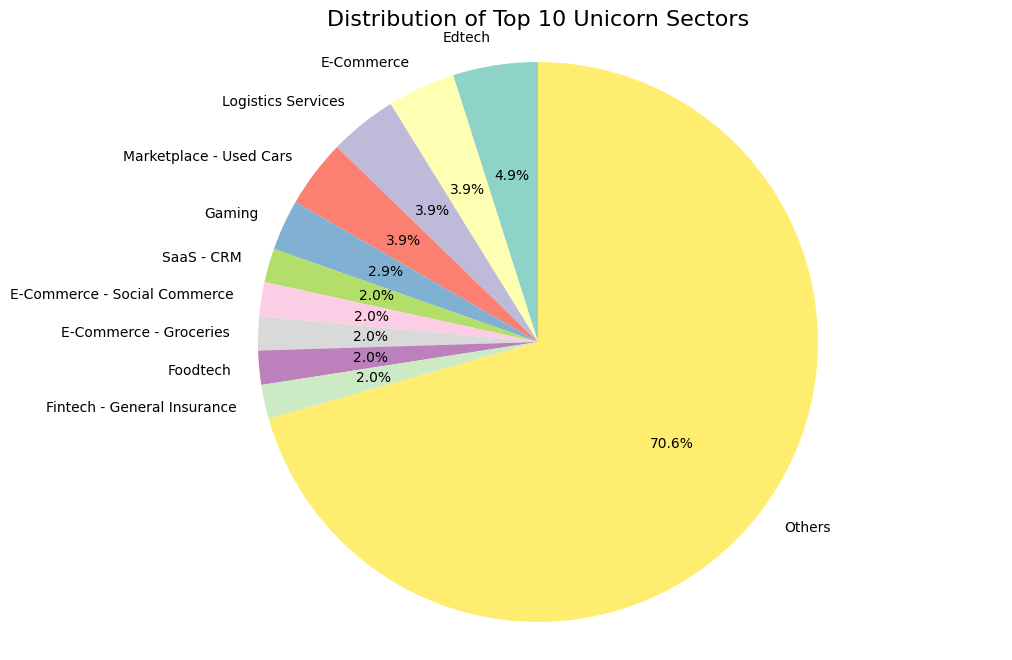

In [ ]:
def display_top_k_sectors(df,k):
  sector_counts=df['Sector'].value_counts()


  if k < len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sectors_count=sector_counts.iloc[k:].sum()
    top_sectors['Others']=other_sectors_count
  else:
    top_sectors=sector_counts


  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1, len(top_sectors)))

  plt.pie(top_sectors.values, labels=top_sectors.index,autopct='%1.1f%%', colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors', fontsize=16,fontweight=10)
  plt.axis('equal')
  plt.show()


display_top_k_sectors(df, 10)

# Top Sectors bar chart

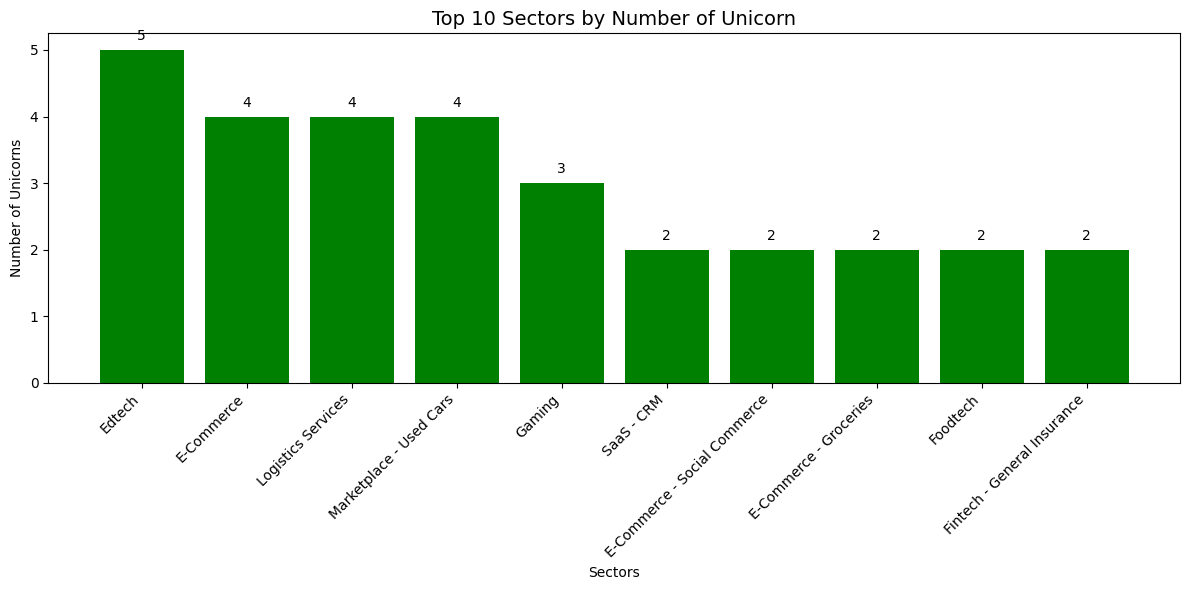

In [ ]:
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)), top_sectors.values,color='green')
plt.title('Top 10 Sectors by Number of Unicorn', fontsize=14,fontweight=12)
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)), top_sectors.index, rotation=45,ha='right')


for bar,value in zip(bars,top_sectors.values):
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.1,str(value), ha='center',va='bottom')
plt.tight_layout()
plt.show()




# Geographical Distribution

city wise distribution

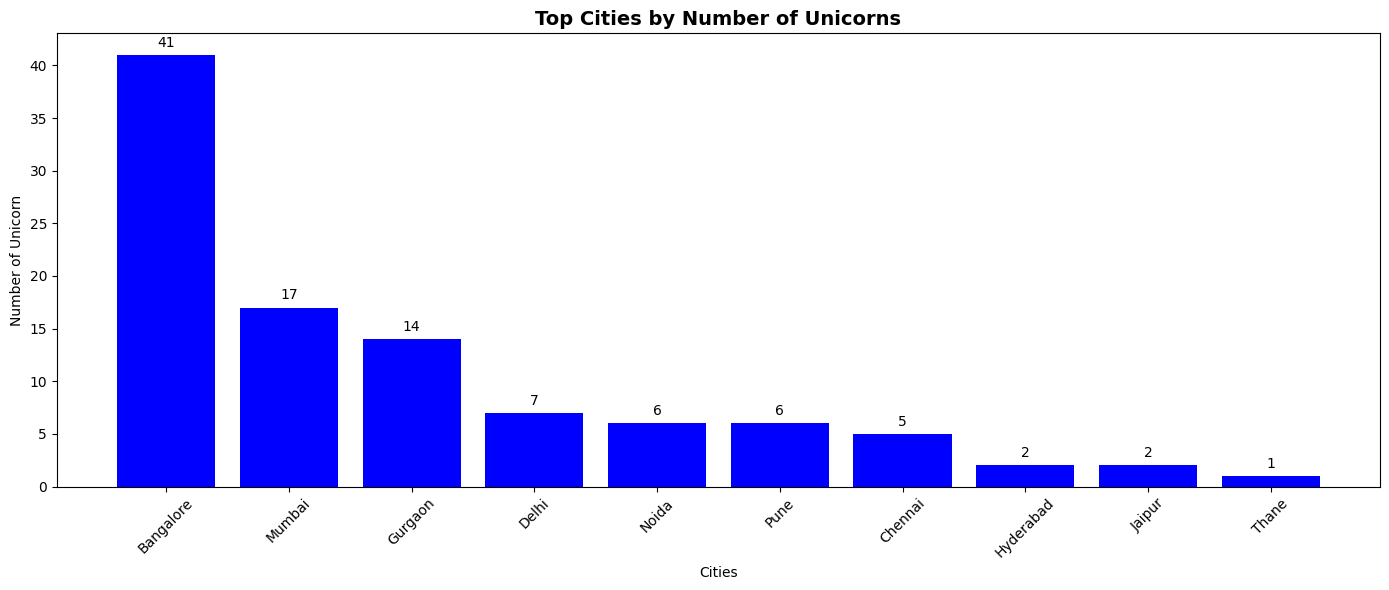

In [ ]:
plt.figure(figsize=(14,6))

city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='blue')
plt.title('Top Cities by Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorn')
plt.xticks(rotation=45)
#add value label



for bar,value in zip(bars,city_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.5,str(value), ha='center',va='bottom')
plt.tight_layout()
plt.show()





# Create a summary table

In [ ]:
city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count','sum','mean'],
    'Entry_Year': ['min','max']
}).round(2)
city_summary.columns=['Count','Total_Valuation','Avg_Valuation','First_Entry','Last_Entry']
city_summary.head(10)

,Count,Total_Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


# Temporal Analysis

# Entry year trends

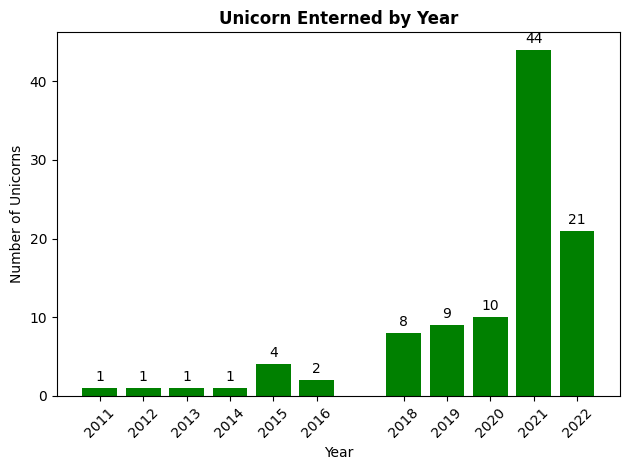

In [ ]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='green' )
plt.title('Unicorn Enterned by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)


for bar,value in zip(bars,yearly_entries.values):
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.5,str(value), ha='center',va='bottom')
plt.tight_layout()
plt.show()


circumulative unicorns

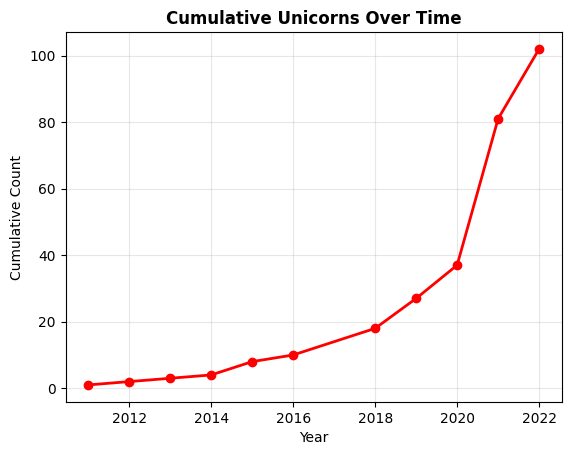

In [ ]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,color='red')
plt.title('Cumulative Unicorns Over Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True, alpha=0.3)
plt.show()

# Average valuation by year

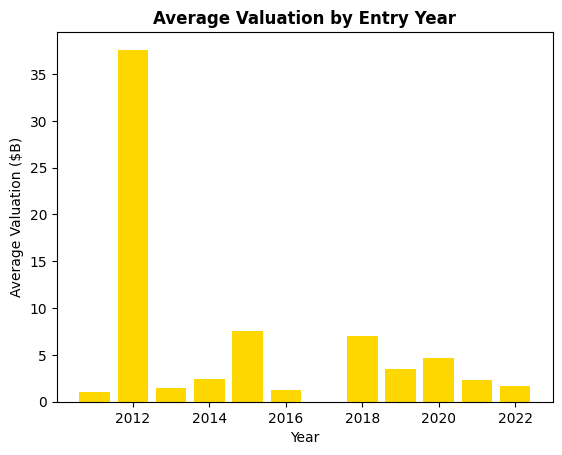

In [ ]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='gold')
plt.title('Average Valuation by Entry Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

sector evolution over time

In [ ]:
def display_k_sector_evolution(df,k):
   sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

   top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
   sector_year=sector_year[top_k_sectors_names]

   plt.figure(figsize=(15, 8))
   sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

   plt.title(f'Evolution of Top {k} Sectors Over Time',fontweight='bold')
   plt.xlabel('Year')
   plt.ylabel('Number of Unicorns')
   plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
   plt.yticks(range(0,sector_year.values.max() +5))
   plt.grid(True,alpha=0.3)
   plt.tight_layout()
   plt.show()



call the function with k=5

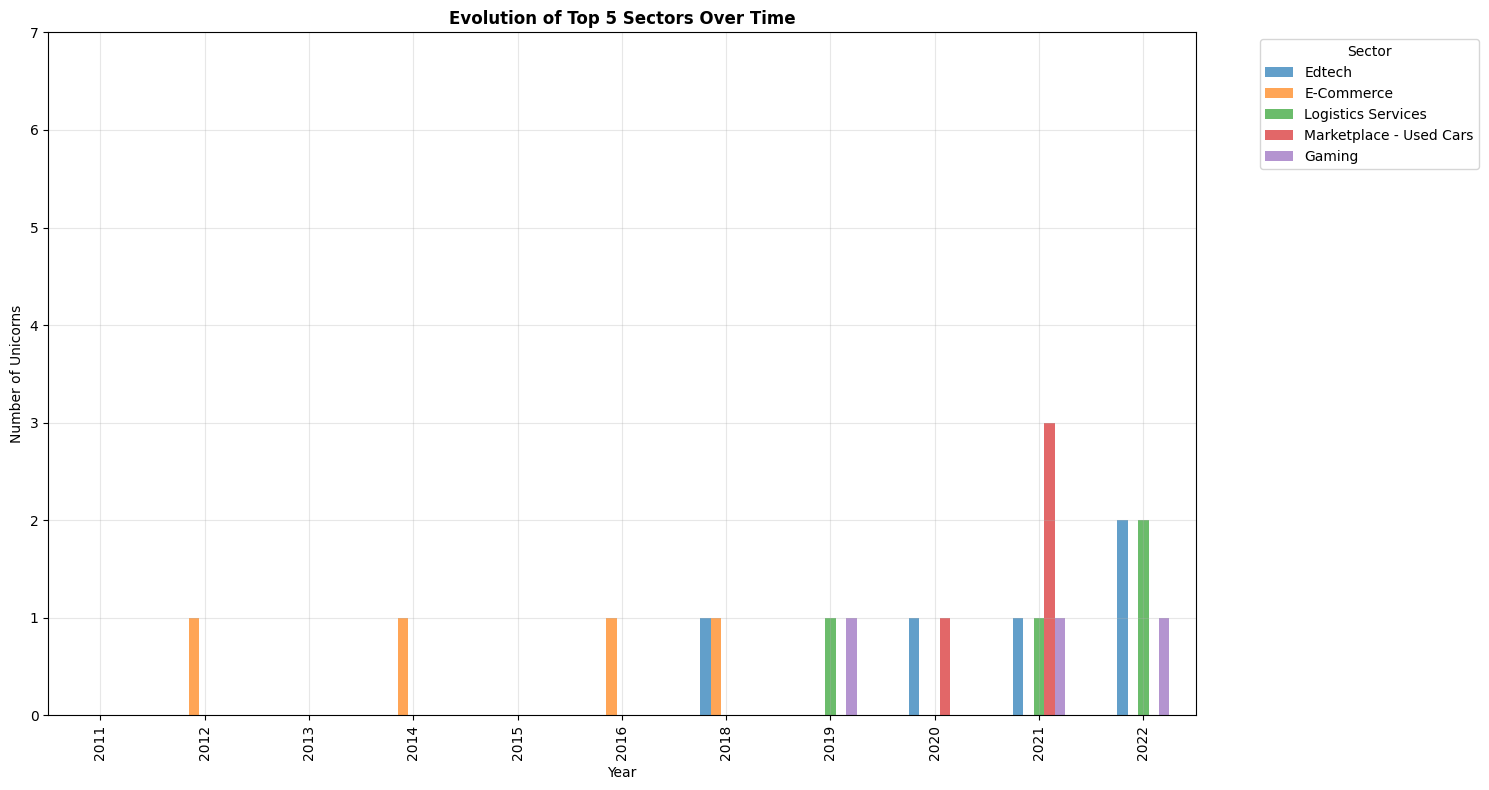

In [ ]:
display_k_sector_evolution(df,5)

Brivate analysis

valuatio0n vs sector Analysis

Average valuation by sector

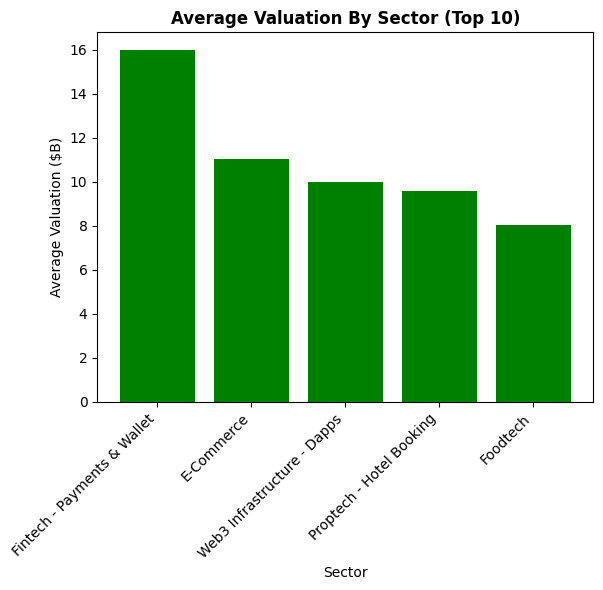

In [ ]:
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head()


bars=plt.bar(range(len(avg_valuation)),avg_valuation.values,color='green')

plt.title('Average Valuation By Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)), avg_valuation.index, rotation=45,ha='right')
plt.show()


# Sector vs Count vs Total Valuation

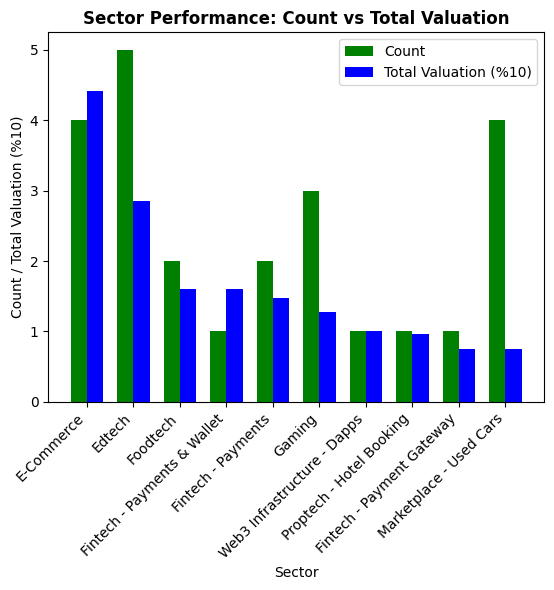

In [ ]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)':['count','sum']

}).round(2)
sector_summary.columns=['Count','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2,sector_summary['Count'],width,label='Count',color='green')
plt.bar(x + width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (%10)',color='blue')
plt.title('Sector Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count / Total Valuation (%10)')
plt.xticks(x,sector_summary.index,rotation=45, ha='right')
plt.legend()
plt.show()


# Geographical vs Valuation Analysis

Average Valuation By City

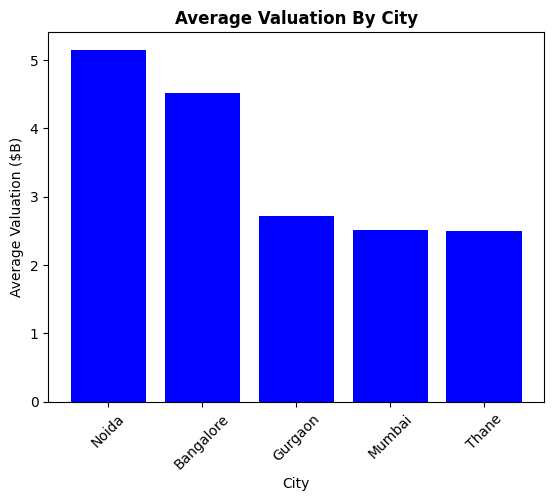

In [ ]:
city_valuation=df.groupby('Primary_City') ['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head()

bars=plt.bar(city_valuation.index,city_valuation.values,color='blue')

plt.title('Average Valuation By City',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

City vs Total Valuation

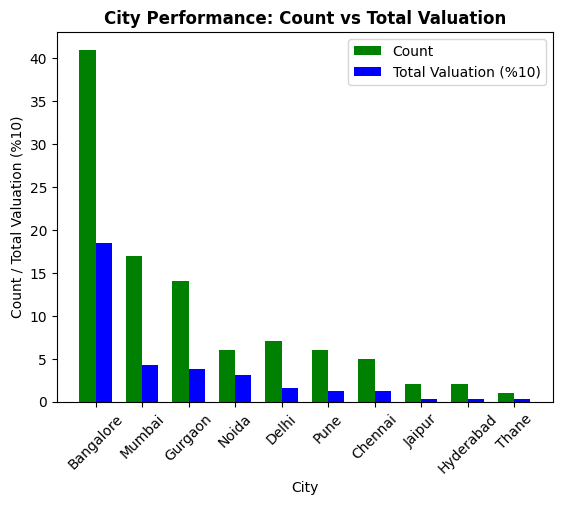

In [ ]:
city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum']

}).round(2)
city_summary.columns=['Count','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2,city_summary['Count'],width,label='Count',color='green')
plt.bar(x + width/2,city_summary['Total_Valuation']/10,width,label='Total Valuation (%10)',color='blue')
plt.title('City Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count / Total Valuation (%10)')
plt.xticks(x,city_summary.index,rotation=45)
plt.legend()
plt.show()


# Investors and Time-Based Analysis

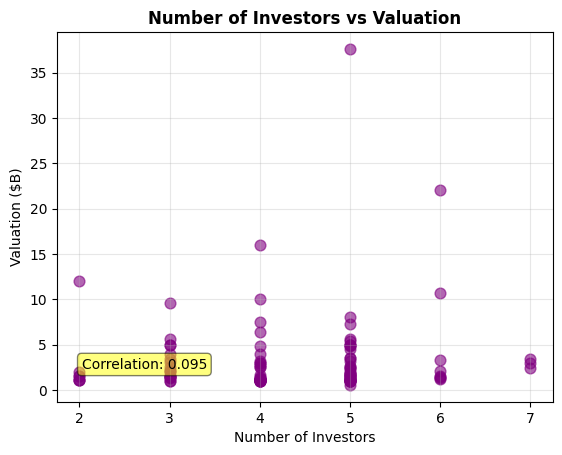

In [ ]:
plt.scatter(df['investors_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='purple')
plt.title('Number of Investors vs Valuation', fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)


correlation=df['investors_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.09,f'Correlation: {correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle="round,pad=0.3",facecolor="yellow",alpha=0.5))
plt.show()

Most Active Investors

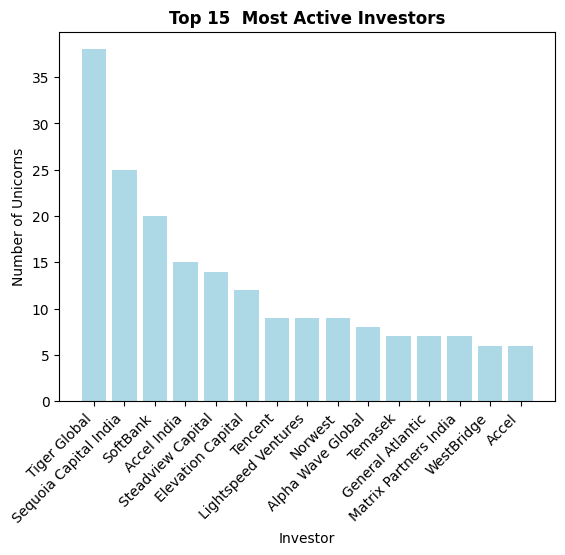

In [ ]:
all_investors=[]
for investors in df['Select Investors'].dropna():
    all_investors.extend(inv.strip() for inv in investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='lightblue')
plt.title('Top 15  Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

In [ ]:
all_investors=[]
for investors in df['Select Investors'].dropna():
    all_investors.extend([inv.strip() for inv in investors.split(',')])
investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_count)))

# Entry Years vs Investors count

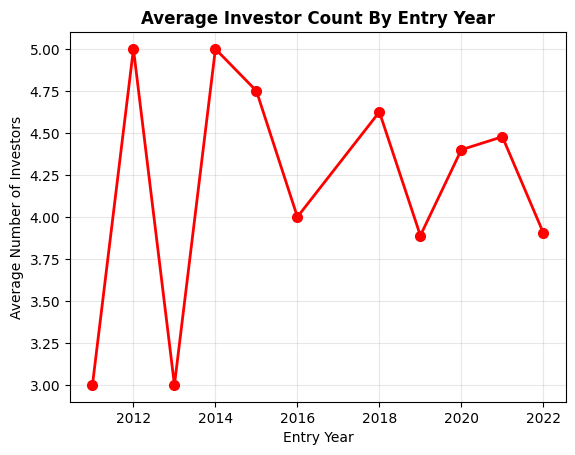

In [ ]:
year_investor=df.groupby('Entry_Year') ['investors_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,markersize=7,color='red')
plt.title('Average Investor Count By Entry Year',fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Number of Investors')
plt.grid(True,alpha=0.3)
plt.show()

investors count distribution

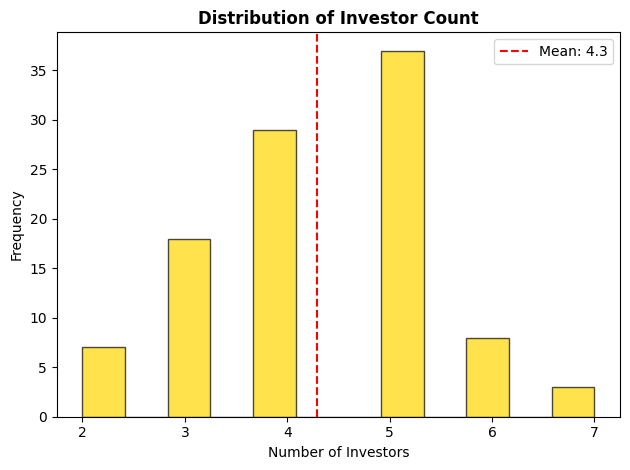

In [ ]:
plt.hist(df['investors_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distribution of Investor Count',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['investors_Count'].mean(),color='red',linestyle='--',label=f'Mean: {df["investors_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

time based advance analysis